# Short explanation of a t test
- t test tests the likelihood of obtaining a value of t from a normal population
- t is a weighted mean in a sense. More specifically, t is the difference between two means divided by (weighted by) a standard deviation.
- There is more than 1 way to perform a t test. We will start with a single sample t test and move on to other types of t tests later.

# "Single sample" t test
- One, it should be noted that researchers working at Guinness Brewer are often credited with creating the t test while studying barley...
- $t = \frac{\bar{X}-\mu}{\bar{\sigma}}\sqrt{n}$ where
    - $\bar{X}$ is the sample mean
    - $\mu$ is a hypothesized mean
    - n is the # of measurements collected 
    - $\bar{\sigma}$ is the sample standard deviation
- And it is assumed that all data measured comes from a normal distribution.

# Problem 1: Estimate p value using a brute-force sampled distributions of t.

*This is identifcally what we did in class.*

Step 1: Generate a normally distributed population.

Let's start by ensuring we understand how to sample normally distributed data. Using random.norm from numpy, randomly sample 10,000 values from a normal distribution whose mean is 12 and standard deviation is 2. Save the values in a variable called norm_data. Plot a histogram of the collected values and then plot a density plot of the collected values. 

Text(0.5, 1.0, 'Probability Density Function of Random Data')

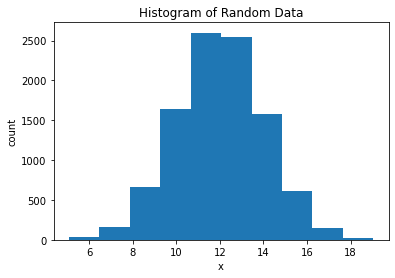

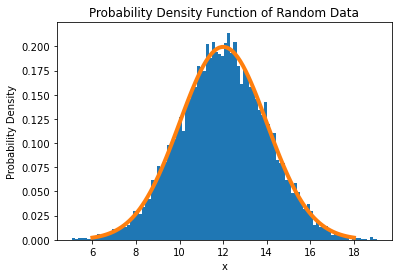

In [1]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

#setting mean and std
mu = 12
sigma = 2

#generating random normal data and make a histogram of it
norm_data = np.random.normal(mu,sigma,10000)
plt.subplots()
plt.hist(norm_data)
plt.xlabel("x")
plt.ylabel("count")
plt.title("Histogram of Random Data")

#plotting the probability density function over a histogram with more bins
plt.subplots()
plt.hist(norm_data, density = True, bins = 100)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x,mu,sigma),linewidth = 4)
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.title("Probability Density Function of Random Data")


Step 2: Use your normally distributed population to generate a "null distribution" of t values for **when n = 3.**

The idea of a null hypothesis can be tricky without some practice. To generate a null hypothesis for any statistic requires choosing representative values, in this case for the population mean $\mu$. Ultimatelty, we are asking "if I know the what my population is, then how much variation is expected in the value of t when I collect data from my defined population?" 

To do this, write a for-loop in which you collect 3 samples from your normal distribution data (norm_data) above and calculate t. Iterate through this loop 1000 times and for each iteration, calculate and save the t statistic. Plot a histogram of the collected values and then plot a density plot of the collected values.

Text(0.5, 1.0, 'Probability Density Function of Collected t-values for n=3')

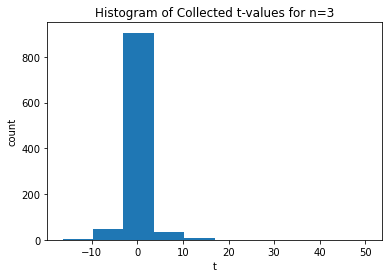

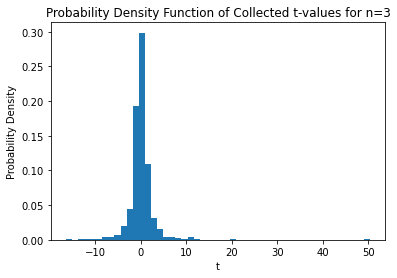

In [2]:
#importing necessary libraries
import random

#randomly sample 3 values from normal distribution and calculate t (stored in weighted_averages)
weighted_averages = np.zeros(1000)

for m in np.arange(0,1000,1):
    tmp = random.sample(list(norm_data),3) #randomly choosing 3 values from the data
    weighted_averages[m] = (np.mean(tmp)-mu)/np.std(tmp,ddof=1)*np.sqrt(3) #calculating t value, if you don't wanna add ddof in there, have to do sprt of n-1

#plot histogram of collected t values
plt.subplots()
plt.hist(weighted_averages)
plt.xlabel("t")
plt.ylabel("count")
plt.title("Histogram of Collected t-values for n=3")

#plotting pdf of t values
plt.subplots()
plt.hist(weighted_averages, density = True, bins = 50)
plt.xlabel("t")
plt.ylabel("Probability Density")
plt.title("Probability Density Function of Collected t-values for n=3")

Check that distribution works correctly.

Let's ensure that we can use our distribution to estimate a p value. You take 3 random measurements and get these numbers: 9.45, 10.3, and 11. Calculate and print your t value (call it t_val) and use your t distribution to estimate the odds of obtaining a t that is less than or equal to t_val. 

Check your answer by using stats.ttest_1samp to compare your p value with a p value calculated using the stats library.

In [3]:
#calculating t value of a specific sample set
sampleset = [9.45,10.3,11]
t_val = (np.mean(sampleset)-mu)/np.std(sampleset,ddof=1)*np.sqrt(3)

#printing my answer and calculating p value for condition
print("For t = ",t_val, " our one sided p value is ", sum(weighted_averages>=t_val)/1000)

#checking my answer with builtin package
stats.ttest_1samp(tmp,200, alternative="greater")

For t =  -3.904992017354407  our one sided p value is  0.969


Ttest_1sampResult(statistic=-320.0008459044777, pvalue=0.9999951172848386)

# Problem 2: Does changing the number of samples collected (n) change the t distribution?

Step 3: Repeat step 2 but collect 6 samples from your normal distributions and the calculate t for each iteration. How do the density plots compare to the answer in Problem 1? Your answer must be clear.

In the density plots, the spread of the distribution isn't as wide as it is with a sample size of 3. It spans from about -5 to 5 whereas the density plot for a sample size of 3 spans from -10 to 10.


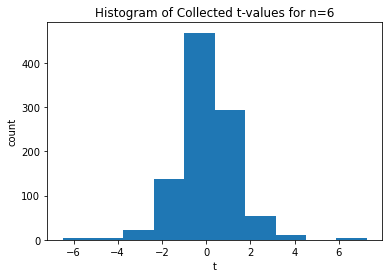

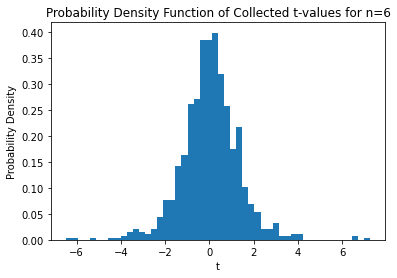

In [5]:
#randomly sample 6 values from normal distribution and calculate t (stored in weighted_averages)
weighted_averages = np.zeros(1000)

for m in np.arange(0,1000,1):
    tmp = random.sample(list(norm_data),6) #randomly choosing 6 values from the data
    weighted_averages[m] = (np.mean(tmp)-mu)/np.std(tmp,ddof=1)*np.sqrt(6) #calculating t value, if you don't wanna add ddof in there, have to do sprt of n-1

#plot histogram of collected t values
plt.subplots()
plt.hist(weighted_averages)
plt.xlabel("t")
plt.ylabel("count")
plt.title("Histogram of Collected t-values for n=6")
    
#create a pdf of t values
plt.subplots()
plt.hist(weighted_averages, density = True, bins = 50)
plt.xlabel("t")
plt.ylabel("Probability Density")
plt.title("Probability Density Function of Collected t-values for n=6")

print("In the density plots, the spread of the distribution isn't as wide as it is with a sample size of 3. It spans from about -5 to 5 whereas the density plot for a sample size of 3 spans from -10 to 10.")

# Problem 3: Does changing the mean and standard deviation of the population change the t distribution?

Step 4: We will skip step 1 this time and just directly pull samples from the population using random.norm($\mu$,$\sigma$,n=3). Write a for-loop in which you collect 3 samples from a normal distribution that has a mean of 6 and a standard deviation of 3 and calculate t. Iterate through this loop 1000 times and for each iteration, calculate and save the t statistic. Plot a histogram of the collected values and then plot a density plot of the collected values. Compare the t distribution to the t distribution estimated in Problem 1 and Comment.

Compared to the t distribution estimated in Problem 1, the spread of the t values is much less spread. This is likely due to 


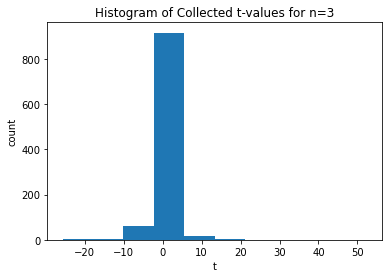

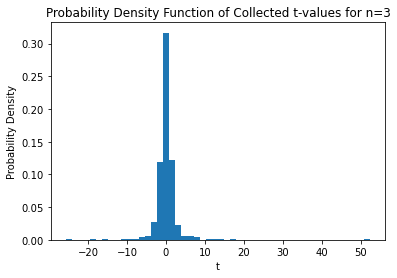

In [10]:
#randomly sample 3 values from normal distribution and calculate t (stored in weighted_averages)
weighted_averages = np.zeros(1000)

mu = 6
sigma = 3

for m in np.arange(0,1000,1):
    tmp = np.random.normal(mu,sigma,3) #randomly choosing 6 values from the data
    weighted_averages[m] = (np.mean(tmp)-mu)/np.std(tmp,ddof=1)*np.sqrt(3) #calculating t value, if you don't wanna add ddof in there, have to do sprt of n-1

#plot histogram of collected t values
plt.subplots()
plt.hist(weighted_averages)
plt.xlabel("t")
plt.ylabel("count")
plt.title("Histogram of Collected t-values for n=3")

#plotting pdf of t values
plt.subplots()
plt.hist(weighted_averages, density = True, bins = 50)
plt.xlabel("t")
plt.ylabel("Probability Density")
plt.title("Probability Density Function of Collected t-values for n=3")

print("Compared to the t distribution estimated in Problem 1, the spread of the t values is much more spread out. This is likely due to the standard deviation of the data being higher than in problem 1, leading to a greater spread of t-values.")

# Our takeways 

- t is used to determine the likelihood of obtaining a value of t with n measurements sampled from a normal distribution.
    - Interesting, the effect of n and the choice of $\mu$ and $\sigma$: <font color=red> Depending on the choice of n, mu and sigma, the spread of the distribution of t-values, when n measurements are sampled from a normal distribution, varies.</font>
- Note we have only covered the "single sample" t test here. A more commonly used t test is the two sample, which we'll cover next.